<a href="https://colab.research.google.com/github/teja82/Assignments/blob/main/28_01_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"
doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"
doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"
documents = [doc_trump, doc_election, doc_putin]

In [ ]:
documents

['Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin',
 'President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election',
 'Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
count_vect =CountVectorizer(stop_words='english')
count_vect =CountVectorizer()
sparse_matrix = count_vect.fit_transform(documents)
doc_term_matrix =sparse_matrix.todense()
df =pd.DataFrame(doc_term_matrix,columns=count_vect.get_feature_names_out(),index=['doc_trump','doc_election','doc_putin'])
df

,after,as,became,by,career,claimed,do,earlier,election,elections,...,the,though,to,trump,vladimir,was,who,winning,witchhunt,with
doc_trump,1,0,1,0,0,0,0,0,1,0,...,2,1,0,2,0,0,0,1,0,1
doc_election,0,0,0,1,0,1,1,0,2,0,...,2,0,1,1,0,1,1,0,1,1
doc_putin,0,1,1,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df,df))

[[1.         0.51480485 0.38890873]
 [0.51480485 1.         0.38829014]
 [0.38890873 0.38829014 1.        ]]


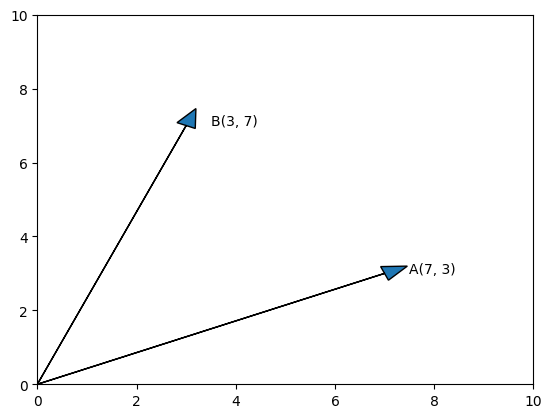

Cosine Similarity between A and B:0.7241379310344827
Cosine Distance between A and B:0.27586206896551735


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
A = np.array([7,3])
B= np.array([3,7])
ax = plt.axes()
ax.arrow (0.0, 0.0, A[0], A[1], head_width=0.4, head_length=0.5)
plt.annotate(f"A({A[0]}, {A [1]})", xy=(A[0], A[1]),xytext=(A [0] +0.5, A[1]))
ax.arrow(0.0, 0.0, B[0], B[1], head_width=0.4, head_length=0.5)
plt.annotate(f"B({B[0]}, {B[1]})", xy=(B[0], B[1]),xytext=(B [0] +0.5, B[1]))
plt.xlim (0,10)
plt.ylim(0,10)
plt.show()
plt.close()


cos_sim =np.dot(A,B)/(np.linalg.norm(A )*np.linalg.norm(B))
print (f"Cosine Similarity between A and B:{cos_sim}")
print (f"Cosine Distance between A and B:{1- cos_sim}")

In [ ]:
A = {1,2,3,4,6}
B = {1,2,5,8,9}
C=A.intersection (B)
D= A.union (B)
print('AnB = ', C)
print('AUB = ', D)
print('J(A, B) = ', float (len (C))/float (len (D)))
float(len(C))/float(len(D))

AnB =  {1, 2}
AUB =  {1, 2, 3, 4, 5, 6, 8, 9}
J(A, B) =  0.25


0.25

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
responses = [

    "You can return an item within 7 days of purchase.",

    "Our return policy allows you to return items that are unopened and in their original condition.",

    "We offer free shipping on orders over $50.",

    "To track your order, you can visit the 'Order Tracking' page and enter your order number.",

    "Our customer support team is available from 9 AM to 6 PM, Monday through Friday."

]

In [ ]:
user_input='How can I track my order?'

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
all_texts = responses + [user_input]

In [ ]:
tfidf_matrix = vectorizer.fit_transform(all_texts)

In [ ]:
user_vector = tfidf_matrix[-1]
response_vectors = tfidf_matrix[:-1]
cosine_similarity = cosine_similarity(user_vector, response_vectors)

In [ ]:
most_similar_index = np.argmax(cosine_similarity)

In [ ]:
print("User Input:", user_input)
print("Most Similar Response:", responses[most_similar_index])

User Input: How can I track my order?
Most Similar Response: To track your order, you can visit the 'Order Tracking' page and enter your order number.


In [6]:
import io
import random
import string # to process standard python strings
import warnings
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
import nltk
from nltk.stem import WordNetLemmatizer
warnings.filterwarnings('ignore')


In [7]:
nltk.download('popular', quiet=True) # for downloading packages
nltk.download('punkt') # first-time use only
nltk.download('wordnet') # first-time use only

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
f=open('input.txt','r',errors = 'ignore')
raw=f.read()
raw = raw.lower()

In [9]:
import nltk
nltk.download('punkt_tab')
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences
word_tokens = nltk.word_tokenize(raw)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [10]:
lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [11]:
GREETING_INPUTS = ("hello", "hi", "greetings", "what's up","hey",\
                   "how are you?")
GREETING_RESPONSES = ["hi", "hey", "hi there", "hello", \
                      "I am glad! You are talking to me", \
                      "I am fine! How about you?"]
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [12]:
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you."
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [13]:
flag=True
print("SABot: My name is SABot. How can I assist you?. \
If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("SABot: You are welcome...")
        else:
            if(greeting(user_response)!=None):
                print("SABot: "+greeting(user_response))
            else:
                print("SABot: ",end=" ")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("SABot: Bye! take care...")

SABot: My name is SABot. How can I assist you?. If you want to exit, type Bye!
Hi
SABot: hi there
How are you?
SABot:  I am sorry! I don't understand you.
Good Morning
SABot:  lemmatization uses vocabulary and morphological analysis to return the base or dictionary form of a word (e.g., "better" → "good").
Bye
SABot: Bye! take care...
